In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
F= 'https://assets.datacamp.com/production/repositories/3515/datasets/802fc5cdbe3a29248483e496a966627ea9629e7a/ANSUR_II_FEMALE.csv'
M= 'https://assets.datacamp.com/production/repositories/3515/datasets/28edd853c0a6aa7316b0d84a21f8e0d821e5010d/ANSUR_II_MALE.csv'

# 
ansur_df_1= pd.read_csv(M)


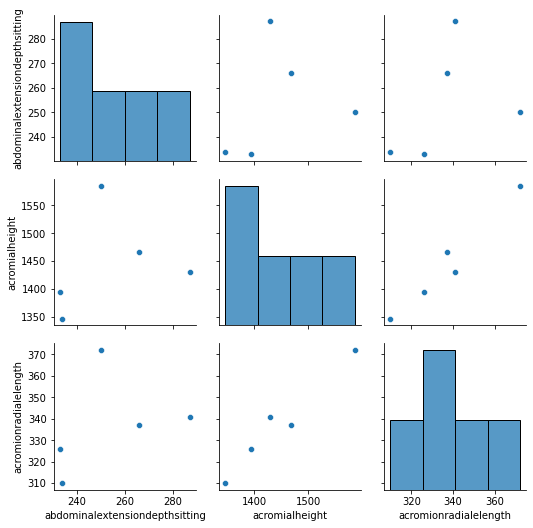

In [8]:
df= ansur_df_1.iloc[0:5, 3:6]
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(df, diag_kind='hist')


# Show the plot
plt.show()


The selected features remain unchanged, and are therefore easier to interpret then Feature Selection

#t-SNE
When you want to visually explore the patterns in a high dimensional dataset.


# Fitting t-SNE to the ANSUR data

t-SNE is a great technique for visual exploration of high dimensional datasets. In this exercise, you'll apply it to the ANSUR dataset. You'll remove non-numeric columns from the pre-loaded dataset df and fit TSNE to this numeric dataset.

In [10]:
from sklearn.manifold import TSNE

In [18]:
df= pd.read_csv(F)
df= df.iloc[0:, 0:11]

# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(1986, 2)


# Train - test split

In this chapter, you will keep working with the ANSUR dataset. Before you can build a model on your dataset, you should first decide on which feature you want to predict. In this case, you're trying to predict gender.

You need to extract the column holding this feature from the dataset and then split the data into a training and test set. The training set will be used to train the model and the test set will be used to check its performance on unseen data.

ansur_df has been pre-loaded for you.

In [29]:
df= pd.read_csv(M)
df1= pd.read_csv(F)
frames= (df, df1)
ansur_df=pd.concat(frames)
ansur_df= ansur_df.sample(n=200)
ansur_df.select_dtypes('object').columns.to_list()


['Branch', 'Component', 'Gender', 'BMI_class', 'Height_class']

In [36]:
ansur_df.drop(['Branch', 'Component', 'BMI_class', 'Height_class'], axis=1, inplace=True)

In [37]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

print(f"{X_test.shape[0]} rows in test set vs. {X_train.shape[0]} in training set, {X_test.shape[1]} Features.")

60 rows in test set vs. 140 in training set, 94 Features.


# Fitting and testing the model

In the previous exercise, you split the dataset into X_train, X_test, y_train, and y_test. These datasets have been pre-loaded for you. You'll now create a support vector machine classifier model (SVC()) and fit that to the training data. You'll then calculate the accuracy on both the test and training set to detect overfitting.

In [38]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

88.3% accuracy on test set vs. 88.6% on training set


# Accuracy after dimensionality reduction

You'll reduce the overfit with the help of dimensionality reduction. In this case, you'll apply a rather drastic form of dimensionality reduction by only selecting a single column that has some good information to distinguish between genders. You'll repeat the train-test split, model fit and prediction steps to compare the accuracy on test versus training data.

All relevant packages and y have been pre-loaded.

In [40]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

#model can overfit with too many features

95.0% accuracy on test set vs. 96.4% on training set


In [48]:
# Normalize the data
normalized_df = school_df / school_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

address                NaN
bldg_id       1.688707e+00
bldg_name              NaN
city                   NaN
complex                NaN
csp_sch_id    1.786449e-01
label         3.321566e-01
objectid      8.791452e+00
objectid_1    3.308081e-01
pl                     NaN
point_x       1.679555e-04
point_y       1.865406e-05
sch_id        1.786449e-01
sch_label              NaN
sch_name               NaN
sch_type               NaN
shared                 NaN
tlt           1.880181e-01
x             2.689333e-07
y             6.765448e-07
zipcode       3.501418e-05
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


# Features with low variance

In the previous exercise you established that 0.001 is a good threshold to filter out low variance features in head_df after normalization. Now use the VarianceThreshold feature selector to remove these features.

In [49]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=.001)

# Fit the selector to normalized head_df
sel.fit(school_df / school_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced DataFrame
reduced_df = school_df.loc[:, mask]

print(f"Dimensionality reduced from {school_df.shape[1]} to {reduced_df.shape[1]}.")

Dimensionality reduced from 21 to 7.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_variance_threshold.py:104: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


# Removing features with many missing values

You'll apply feature selection on the Boston Public Schools dataset which has been pre-loaded as school_df. Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.

In [46]:
school_df= pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/8d23ca278dcc6c6b59629a47e1474afd93ad960c/Public_Schools2.csv')

#find the value to use the mask
school_df.isna().sum()/len(school_df)

x             0.000000
y             0.000000
objectid_1    0.000000
objectid      0.000000
bldg_id       0.000000
bldg_name     0.000000
address       0.000000
city          0.000000
zipcode       0.000000
csp_sch_id    0.000000
sch_id        0.000000
sch_name      0.000000
sch_label     0.000000
sch_type      0.000000
shared        0.877863
complex       0.984733
label         0.000000
tlt           0.000000
pl            0.000000
point_x       0.000000
point_y       0.000000
dtype: float64

In [47]:

# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


# Visualizing the correlation matrix

Reading the correlation matrix of ansur_df in its raw, numeric format doesn't allow us to get a quick overview. Let's improve this by removing redundant values and visualizing the matrix using seaborn.

Seaborn has been pre-loaded as sns, matplotlib.pyplot as plt, NumPy as np and pandas as pd.

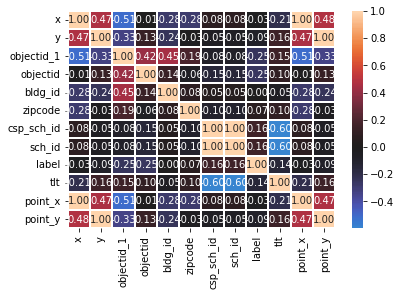

In [51]:
# Create the correlation matrix
corr = school_df.corr()

# Draw a heatmap of the correlation matrix
sns.heatmap(corr, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

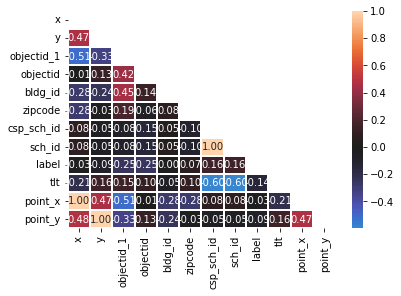

In [52]:
# Create the correlation matrix
corr = school_df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

# Filtering out highly correlated features

You're going to automate the removal of highly correlated features in the numeric ANSUR dataset. You'll calculate the correlation matrix and filter out columns that have a correlation coefficient of more than 0.95 or less than -0.95.

Since each correlation coefficient occurs twice in the matrix (correlation of A to B equals correlation of B to A) you'll want to ignore half of the correlation matrix so that only one of the two correlated features is removed. Use a mask trick for this purpose.

In [55]:
ansur_df= df

In [56]:
# Calculate the correlation matrix and take the absolute value
corr_df = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  .95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print(f"The reduced_df DataFrame has {reduced_df.shape[1]} columns.")

The reduced_df DataFrame has 88 columns.


In [74]:
indian= pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/87ced33d5371cdc13f9301ecb99ead36a63c8197/PimaIndians.csv')
indian
X= indian.drop('test', axis=1)
y= indian.test
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.20)

# Building a diabetes classifier

You'll be using the Pima Indians diabetes dataset to predict whether a person has diabetes using logistic regression. There are 8 features and one target in this dataset. The data has been split into a training and test set and pre-loaded for you as X_train, y_train, X_test, and y_test.

A StandardScaler() instance has been predefined as scaler and a LogisticRegression() one as lr.

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
lr= LogisticRegression()
scaler= StandardScaler()

In [66]:
#  Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print(f"{accuracy_score(y_test, y_pred):.1%} accuracy on test set.")
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

77.2% accuracy on test set.
{'pregnant': 0.15, 'glucose': 1.29, 'diastolic': 0.02, 'triceps': 0.22, 'insulin': 0.25, 'bmi': 0.38, 'family': 0.43, 'age': 0.53}


# Manual Recursive Feature Elimination

Now that we've created a diabetes classifier, let's see if we can reduce the number of features without hurting the model accuracy too much.

On the second line of code the features are selected from the original DataFrame. Adjust this selection.

A StandardScaler() instance has been predefined as scaler and a LogisticRegression() one as lr.

All necessary functions and packages have been pre-loaded too.

In [68]:
# Remove the feature with the lowest model coefficient
X = indian[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.") 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

80.6% accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.24, 'triceps': 0.24, 'insulin': 0.2, 'bmi': 0.39, 'family': 0.34, 'age': 0.35}


In [69]:
# Remove the 2 features with the lowest model coefficients
X = indian[['glucose', 'triceps',  'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.") 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

79.6% accuracy on test set.
{'glucose': 1.13, 'triceps': 0.25, 'bmi': 0.34, 'family': 0.34, 'age': 0.37}


In [71]:
# Only keep the feature with the highest coefficient
X = indian[['glucose']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model to the data
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print(f"{acc:.1%} accuracy on test set.")  
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

75.5% accuracy on test set.
{'glucose': 1.28}


# Automatic Recursive Feature Elimination

Now let's automate this recursive process. Wrap a Recursive Feature Eliminator (RFE) around our logistic regression estimator and pass it the desired number of features.

All the necessary functions and packages have been pre-loaded and the features have been scaled for you.

In [72]:
from sklearn.feature_selection import RFE

In [75]:
# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fit the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print(f"{acc:.1%} accuracy on test set.") 

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 1, 'glucose': 2, 'diastolic': 5, 'triceps': 4, 'insulin': 6, 'bmi': 1, 'family': 1, 'age': 3}
Index(['pregnant', 'bmi', 'family'], dtype='object')
69.6% accuracy on test set.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


# Building a random forest model

You'll again work on the Pima Indians dataset to predict whether an individual has diabetes. This time using a random forest classifier. You'll fit the model on the training data after performing the train-test split and consult the feature importance values.

The feature and target datasets have been pre-loaded for you as X and y. Same goes for the necessary packages and functions.

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
yhat= rf.predict(X_test)

# Calculate the accuracy
acc = accuracy_score(y_test, yhat)

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print(f"{acc:.1%} accuracy on test set.") 

{'pregnant': 0.07, 'glucose': 0.25, 'diastolic': 0.09, 'triceps': 0.09, 'insulin': 0.14, 'bmi': 0.12, 'family': 0.12, 'age': 0.13}
79.6% accuracy on test set.


# Random forest for feature selection

Now lets use the fitted random model to select the most important features from our input dataset X.

The trained model from the previous exercise has been pre-loaded for you as rf.

In [81]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.13

# Apply the mask to the feature dataset X
reduced_X = X.loc[:, mask]

# prints out the selected column names
print(reduced_X.columns)

Index(['glucose', 'insulin'], dtype='object')


# Recursive Feature Elimination with random forests

You'll wrap a Recursive Feature Eliminator around a random forest model to remove features step by step. This method is more conservative compared to selecting features after applying a single importance threshold. Since dropping one feature can influence the relative importances of the others.

You'll need these pre-loaded datasets: X, X_train, y_train.

Functions and classes that have been pre-loaded for you are: RandomForestClassifier(), RFE(), train_test_split().

In [82]:
# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=2, step=2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Index(['glucose', 'insulin'], dtype='object')


In [88]:
X= indian.drop(['bmi', 'test'], axis=1)
y= indian.drop(['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin',
       'family', 'age', 'test'], axis=1)

# Creating a LASSO regressor

You'll be working on the numeric ANSUR body measurements dataset to predict a persons Body Mass Index (BMI) using the pre-imported Lasso() regressor. BMI is a metric derived from body height and weight but those two features have been removed from the dataset to give the model a challenge.

You'll standardize the data first using the StandardScaler() that has been instantiated for you as scaler to make sure all coefficients face a comparable regularizing force trying to bring them down.

All necessary functions and classes plus the input datasets X and y have been pre-loaded.

In [92]:
from sklearn.linear_model import Lasso
# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)

Lasso()

# Lasso model results

Now that you've trained the Lasso model, you'll score its predictive capacity (
R
2
) on the test set and count how many features are ignored because their coefficient is reduced to zero.

The X_test and y_test datasets have been pre-loaded for you.

The Lasso() model and StandardScaler() have been instantiated as la and scaler respectively and both were fitted to the training data.

In [93]:
# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print(f"The model can predict {r_squared:.1%} of the variance in the test set.")

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print(f"The model has ignored {n_ignored} out of {len(la.coef_)} features.")

The model can predict 51.0% of the variance in the test set.
The model has ignored 4 out of 7 features.


# Adjusting the regularization strength

Your current Lasso model has an 
R
2
 score of 84.7%. When a model applies overly powerful regularization it can suffer from high bias, hurting its predictive power.

Let's improve the balance between predictive power and model simplicity by tweaking the alpha parameter.

In [94]:
# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=0.1, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print(f"The model can predict {r_squared:.1%} of the variance in the test set.")
print(f"{n_ignored_features} out of {len(la.coef_)} features were ignored.")

The model can predict 46.8% of the variance in the test set.
0 out of 7 features were ignored.


# Creating a LassoCV regressor

You'll be predicting biceps circumference on a subsample of the male ANSUR dataset using the LassoCV() regressor that automatically tunes the regularization strength (alpha value) using Cross-Validation.

The standardized training and test data has been pre-loaded for you as X_train, X_test, y_train, and y_test.

In [104]:
from sklearn.linear_model import LassoCV

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25)
# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print(f'Optimal alpha = {lcv.alpha_:.3f}')

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print(f'The model explains {r_squared:.1%} of the test set variance')

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print(f'{sum(lcv_mask)} features out of {len(lcv_mask)} selected')

Optimal alpha = 2.562
The model explains 86.8% of the test set variance
51 features out of 92 selected


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.927e+03, tolerance: 3.643e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


# Ensemble models for extra votes

The LassoCV() model selected 22 out of 32 features. Not bad, but not a spectacular dimensionality reduction either. Let's use two more models to select the 10 features they consider most important using the Recursive Feature Eliminator (RFE).

The standardized training and test data has been pre-loaded for you as X_train, X_test, y_train, and y_test.

In [106]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=20, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set')

# Assign the support array to rf_mask
rf_mask = rfe_rf.support_

Fitting estimator with 92 features.
Fitting estimator with 72 features.
Fitting estimator with 52 features.
Fitting estimator with 32 features.
Fitting estimator with 12 features.
The model can explain 83.7% of the variance in the test set


In [112]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes == 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print(f'The model can explain {r_squared:.1%} of the variance in the test set using {len(lm.coef_)} features.')

The model can explain 77.0% of the variance in the test set using 2 features.


In [3]:
sales_df= pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/236dfa1d124bf01147dd5b3da595066fcf84a1a4/grocery_sales.csv')

# Manual feature extraction I

You want to compare prices for specific products between stores. The features in the pre-loaded dataset sales_df are: storeID, product, quantity and revenue. The quantity and revenue features tell you how many items of a particular product were sold in a store and what the total revenue was. For the purpose of your analysis it's more interesting to know the average price per product.

In [4]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue']/ sales_df.quantity

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['quantity', 'revenue'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


#Manual feature extraction II

You're working on a variant of the ANSUR dataset, height_df, where a person's height was measured 3 times: height_1, height_2, height_3. Add a feature with the mean height to the dataset, then drop the 3 original features

In [5]:
dic= {'weight_kg':[81.5,72.6,92.9, 79.4, 94.6], 'height_1': [1.78,1.7,1.74,1.66,1.91], 'height_2':[1.8,1.7,1.75,1.68,1.93], 'height_3': [1.8,1.69,1.73,1.67,1.90]}
height_df= pd.DataFrame(dic)


In [6]:
# Calculate the mean height
height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# Drop the 3 original height features
reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)

print(reduced_df.head())

   weight_kg    height
0       81.5  1.793333
1       72.6  1.696667
2       92.9  1.740000
3       79.4  1.670000
4       94.6  1.913333


# Calculating Principal Components

You'll visually inspect a 4 feature sample of the ANSUR dataset before and after PCA using Seaborn's pairplot(). This will allow you to inspect the pairwise correlations between the features.

The data has been pre-loaded for you as ansur_df

In [13]:
ansur_df= ansur_df[['weight_kg', 'buttockheight', 'waistcircumference', 'shouldercircumference']]

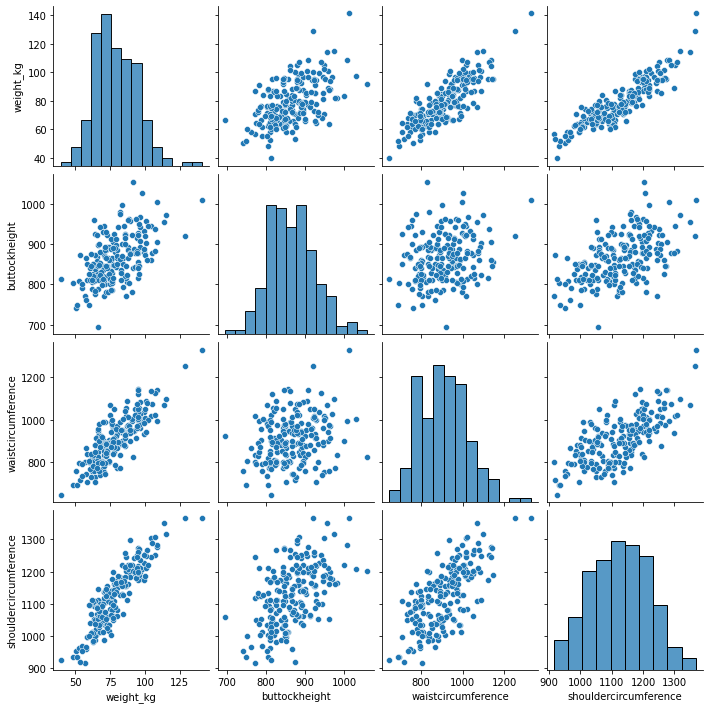

In [27]:
sns.pairplot(ansur_df)

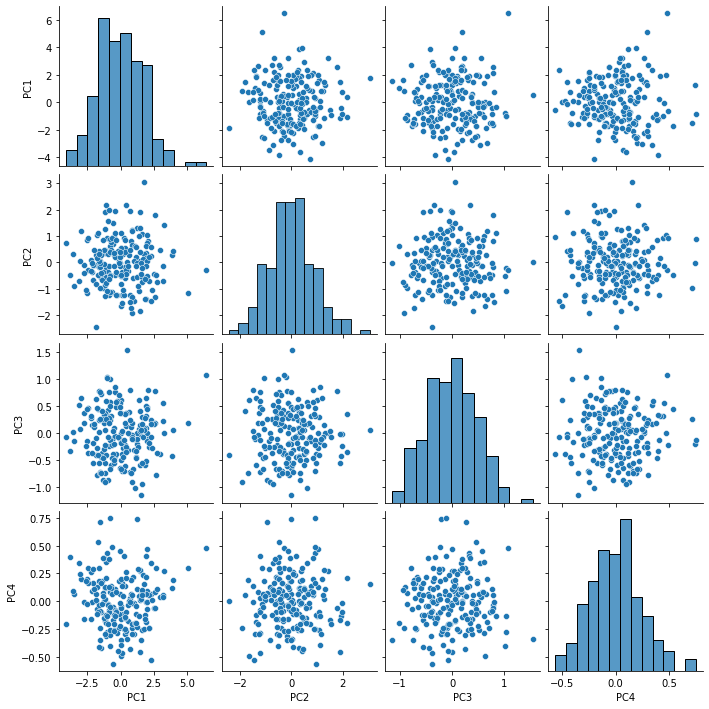

In [26]:
# import modules 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#create scaler
scaler=StandardScaler()
ansur_std= scaler.fit_transform(ansur_df)

#Create PCA instance and fit and transform data with pca
pca= PCA()
pc= pca.fit_transform(ansur_std)
pc_df= pd.DataFrame(pc, columns=['PC1', 'PC2', 'PC3', 'PC4'])

#create pairplot
sns.pairplot(pc_df)

#Good job! Notice how, in contrast to the input features, 
# none of the principal components are correlated to one another.

# PCA on a larger dataset

You'll now apply PCA on a somewhat larger ANSUR datasample with 13 dimensions, once again pre-loaded as ansur_df. The fitted model will be used in the next exercise. Since we are not using the principal components themselves there is no need to transform the data, instead, it is sufficient to fit pca to the data.

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

PCA()

In [36]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[6.94513181e-01 1.72305138e-01 4.45218595e-02 2.90534712e-02
 2.00401431e-02 1.05390304e-02 8.42379002e-03 7.64053388e-03
 4.68003682e-03 3.79695522e-03 2.71559647e-03 1.34257708e-03
 4.27686682e-04]


In [37]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.69451318 0.86681832 0.91134018 0.94039365 0.96043379 0.97097282
 0.97939661 0.98703715 0.99171718 0.99551414 0.99822974 0.99957231
 1.        ]


In [51]:
poke_df1= pd.read_csv('https://assets.datacamp.com/production/repositories/3515/datasets/9b0682ecacc5a3429f62947794d1adbeecbd5a11/pokemon.csv')

# Understanding the components

You'll apply PCA to the numeric features of the Pokemon dataset, poke_df, using a pipeline to combine the feature scaling and PCA in one go. You'll then interpret the meanings of the first two components.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).

In [44]:
from sklearn.pipeline import Pipeline

#build the pipeline
pipe= Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=2))])

#fit it to dataset and extract the component vectors
pipe.fit(poke_df)
vectors= pipe['reducer'].components_.round(2)

#print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

# All features have a similar positive effect. PC 1 can be interpreted
# as a measure of overall quality (high stats).

# Defense has a strong positive effect on the second component and speed a strong negative one. 
# This component quantifies an agility versus armor and protection trade-off.

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


# PCA for feature exploration

You'll use the PCA pipeline you've built in the previous exercise to visually explore how some categorical features relate to the variance in poke_df. These categorical features (Type & Legendary) can be found in a separate DataFrame poke_cat_df.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA())

In [53]:
poke_df1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [54]:
poke_df= poke_df1[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
poke_cat_df= poke_df1[['Type 1', 'Legendary']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


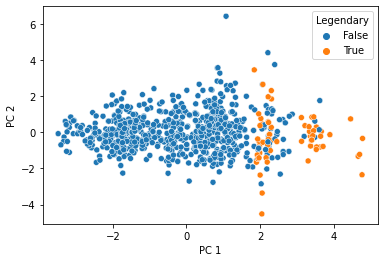

In [57]:
# create Pipeline
pipe= Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=2))
])

#fit pipeline to poke_df and transform the data
pc= pipe.fit_transform(poke_df)

# add 2 components to poke_cat_df
poke_cat_df['PC 1']= pc[:, 0]
poke_cat_df['PC 2']= pc[:, 1]

# Use the Legendary feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

# PCA in a model pipeline

We just saw that legendary Pokemon tend to have higher stats overall. Let's see if we can add a classifier to our pipeline that detects legendary versus non-legendary Pokemon based on the principal components.

The data has been pre-loaded for you and split into training and tests datasets: X_train, X_test, y_train, y_test.

Same goes for all relevant packages and classes(Pipeline(), StandardScaler(), PCA(), RandomForestClassifier()).

In [58]:
X= poke_df
y= poke_df1.Legendary

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65
...,...,...,...,...,...,...
795,50,100,150,100,150,50
796,50,160,110,160,110,110
797,80,110,60,150,130,70
798,80,160,60,170,130,80


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.25)

# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe['reducer'].explained_variance_ratio_)
print(f'{accuracy:.1%} test set accuracy')



[0.45261717 0.18687533 0.13257769]
95.0% test set accuracy


In [62]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe['reducer'].explained_variance_ratio_)
print(f'{accuracy:.1%} test set accuracy')

[0.45261717 0.18687533]
93.0% test set accuracy


# Selecting the proportion of variance to keep

You'll let PCA determine the number of components to calculate based on an explained variance threshold that you decide.

You'll work on the numeric ANSUR female dataset pre-loaded as ansur_df.

All relevant packages and classes have been pre-loaded too (Pipeline(), StandardScaler(), PCA()).

In [5]:
ansur_df= pd.read_csv(F)
x= ansur_df.select_dtypes('object').columns.to_list()
ansur_df= ansur_df.drop(x, axis=1)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.8))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print(f'{len(pipe["reducer"].components_)} components selected')

11 components selected


In [8]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print(f'{len(pipe["reducer"].components_)} components selected')

23 components selected


# Choosing the number of components

You'll now make a more informed decision on the number of principal components to reduce your data to using the "elbow in the plot" technique. One last time, you'll work on the numeric ANSUR female dataset pre-loaded as ansur_df.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).

Text(0, 0.5, 'Explained variance ratio')

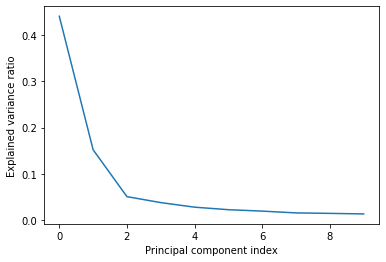

In [9]:
# Pipeline a scaler and pca selecting 10 components
pipe= Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=10))
])

#fit the pipe to the data
pipe.fit(ansur_df)

#plot the explained variance ratio
plt.plot(pipe['reducer'].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')

# Correct! The 'elbow' in the plot is at 3 components (the 3rd component has index 2).

# PCA for image compression

You'll reduce the size of 16 images with hand written digits (MNIST dataset) using PCA.

The samples are 28 by 28 pixel gray scale images that have been flattened to arrays with 784 elements each (28 x 28 = 784) and added to the 2D numpy array X_test. Each of the 784 pixels has a value between 0 and 255 and can be regarded as a feature.

A pipeline with a scaler and PCA model to select 78 components has been pre-loaded for you as pipe. This pipeline has already been fitted to the entire MNIST dataset except for the 16 samples in X_test.

Finally, a function plot_digits has been created for you that will plot 16 images in a grid.

In [ ]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Plot the reconstructed data
plot_digits(X_rebuilt)